In [40]:
# import numpy
# import pandas
# from spsspro.algorithm import statistical_model_analysis
# #生成案例数据
# data = pandas.DataFrame({
#     "A": numpy.random.random(size=20),
#     "B": numpy.random.random(size=20)
# })
# #聚类分析，输入参数详细可以光标放置函数括号内按shift+tab查看，输出结果参考spsspro模板分析报告
# result = statistical_model_analysis.cluster_analysis(data, cluster_num=3)
# print(result)

https://blog.csdn.net/qq_41938858/article/details/87738035

In [41]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn.datasets.samples_generator import make_blobs

In [42]:
# path = '../data/2/red_average.csv'
# file = pd.read_csv(path,encoding='utf-8')
path = '../data/2/white_sum.csv'
file = pd.read_csv(path,encoding='gbk')
file.head()
new_file = file.iloc[:,1:]
new_file.head()
x= new_file.values

In [43]:
# from sklearn.cluster import KMeans
# import numpy as np

# # 构造数据样本点集X，并计算K-means聚类
# # X = np.array([[1, 2], [1, 4], [1, 0], [4, 2], [4, 4], [4, 0]])
# kmeans = KMeans(n_clusters=6).fit(x)

# # 输出及聚类后的每个样本点的标签（即类别），预测新的样本点所属类别
# for index,i in enumerate(kmeans.labels_):
#     print(index,':',i)
# # print(kmeans.labels_)


No handles with labels found to put in legend.


k_means_labels [2 3 5 3 2 1 1 0 4 3 1 4 1 3 2 2 2 1 3 3 5 4 5 3 2 4 2]
(27, 2)
1
1
1
1
1
1


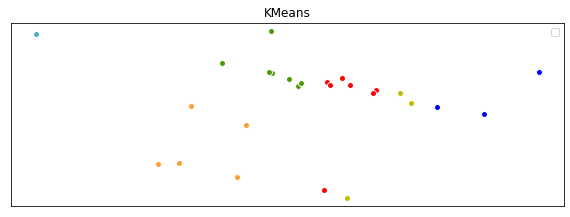

In [44]:
batch_size = 45
centers = x
n_clusters = 6
# X, labels_true = make_blobs(n_samples=3000, centers=centers, cluster_std=0.7)
X=x
# plot result
fig = plt.figure(figsize=(8, 3))
fig.subplots_adjust(left=0.02, right=0.98, bottom=0.05, top=0.9)
colors = ['#4EACC5', '#FF9C34', '#4E9A06','r','y','blue','blace']

# original data
# ax = fig.add_subplot(1, 2, 1)
# row, _ = np.shape(X)
# for i in range(row):
#     ax.plot(X[i, 0], X[i, 1], '#4EACC5', marker='.')

# ax.set_title('Original Data')
# ax.set_xticks(())
# ax.set_yticks(())

# compute clustering with K-Means
k_means = KMeans(init='k-means++', n_clusters=6, n_init=10)
t0 = time.time()
k_means.fit(X)
t_batch = time.time() - t0

k_means_cluster_centers = np.sort(k_means.cluster_centers_, axis=0)
k_means_labels = pairwise_distances_argmin(X, k_means_cluster_centers)
print('k_means_labels', k_means_labels)

from sklearn.datasets import load_digits
from sklearn.decomposition import IncrementalPCA
from scipy import sparse
# X, _ = load_digits(return_X_y=True)
# print(X.shape)
transformer = IncrementalPCA(n_components=2, batch_size=200)
# either partially fit on smaller batches of data
transformer.partial_fit(x)
# or let the fit function itself divide the data into batches
X_sparse = sparse.csr_matrix(x)
X = transformer.fit_transform(X_sparse)
# hc_pred.shape
print(X.shape)
hc_pred = k_means_labels

# K-means
ax = fig.add_subplot(1, 1, 1)
for k, col in zip(range(n_clusters), colors):
    my_members = k_means_labels == k  # my_members是布尔型的数组（用于筛选同类的点，用不同颜色表示）
    cluster_center = k_means_cluster_centers[k]
    ax.plot(X[my_members, 0],
            X[my_members, 1],
            'w',
            markerfacecolor=col,
            marker='o')  # 将同一类的点表示出来
    # ax.plot(cluster_center[0],
    #         cluster_center[1],
    #         'o',
    #         markerfacecolor=col,
    #         markeredgecolor='k',
    #         marker='o')  # 将聚类中心单独表示出来
ax.set_title('KMeans')
ax.set_xticks(())
ax.set_yticks(())

# plt.text(-3.5, 1.8,
#          'train time: %.2fs\ninertia: %f' % (t_batch, k_means.inertia_))
plt.legend()
plt.savefig('./img/k_means.png')
plt.show()


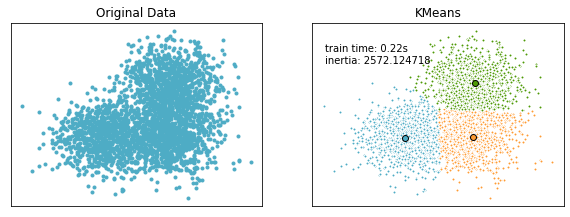

In [45]:
batch_size = 45
centers = [[1, 1], [-1, -1], [1, -1]]
n_clusters = 3
X, labels_true = make_blobs(n_samples=3000, centers=centers, cluster_std=0.7)

# plot result
fig = plt.figure(figsize=(8, 3))
fig.subplots_adjust(left=0.02, right=0.98, bottom=0.05, top=0.9)
colors = ['#4EACC5', '#FF9C34', '#4E9A06']

# original data
ax = fig.add_subplot(1, 2, 1)
row, _ = np.shape(X)
for i in range(row):
    ax.plot(X[i, 0], X[i, 1], '#4EACC5', marker='.')

ax.set_title('Original Data')
ax.set_xticks(())
ax.set_yticks(())

# compute clustering with K-Means
k_means = KMeans(init='k-means++', n_clusters=3, n_init=10)
t0 = time.time()
k_means.fit(X)
t_batch = time.time() - t0

k_means_cluster_centers = np.sort(k_means.cluster_centers_, axis=0)
k_means_labels = pairwise_distances_argmin(X, k_means_cluster_centers)

# K-means
ax = fig.add_subplot(1, 2, 2)
for k, col in zip(range(n_clusters), colors):
    my_members = k_means_labels == k  # my_members是布尔型的数组（用于筛选同类的点，用不同颜色表示）
    cluster_center = k_means_cluster_centers[k]
    ax.plot(X[my_members, 0],
            X[my_members, 1],
            'w',
            markerfacecolor=col,
            marker='.')  # 将同一类的点表示出来
    ax.plot(cluster_center[0],
            cluster_center[1],
            'o',
            markerfacecolor=col,
            markeredgecolor='k',
            marker='o')  # 将聚类中心单独表示出来
ax.set_title('KMeans')
ax.set_xticks(())
ax.set_yticks(())
plt.text(-3.5, 1.8,
         'train time: %.2fs\ninertia: %f' % (t_batch, k_means.inertia_))

plt.show()
